# HEARTBEAT SOUNDS

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import librosa as lr
import glob as g

In [72]:
 # use your path
all_files = g.glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

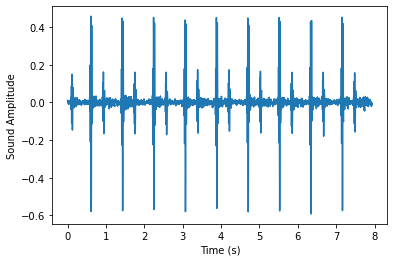

In [74]:

# List all the wav files in the folder
audio_files = glob('../audio/set_a/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

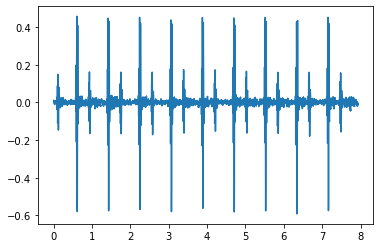

In [37]:
ixs = np.arange(audio.shape[-1])
time = ixs / sfreq
fig, ax = plt.subplots()
ax.plot(time, audio)

In [38]:
print(audio.shape)

(174979,)


In [12]:
from sklearn.svm import LinearSVC

X = np.column_stack([means,maxs,stds])
y = labels.reshape([-1,1])
model = LinearSVC()
mode.fit(X,y)

NameError: name 'labels' is not defined

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal,abnormal]).T


# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

In [ ]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time,mean_normal)
ax1.set(title="Normal Data")

ax2.plot(time,mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train,y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

In [45]:
#Smooth our Data
window_size = 50
windowed = audio.roll(window=window_size)
#windowed = audio.rolling(window=window_size)

audio_smooth = windowed.mean()

AttributeError: module 'numpy' has no attribute 'rolling'

In [67]:
#Ensure all time points are positive:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()


AttributeError: 'list' object has no attribute 'apply'

By calculating the envelope of each sound and smoothing it, you've eliminated much of the noise and have a cleaner signal to tell you when a heartbeat is happening.

In [ ]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

In [ ]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means,stds,maxs])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model,X,y, cv=5)
print(np.mean(percent_score))

In [48]:
from sklearn.model_selection import cross_val_score
model = LinearSVC()
scores = cross_val_score(model, X,y, cv=3)
print(scores)

NameError: name 'y' is not defined

In [53]:
#Librosa
audio_tempo = lr.beat.tempo(audio, sr=sfreq, hop_length=2**6, aggregate=None)

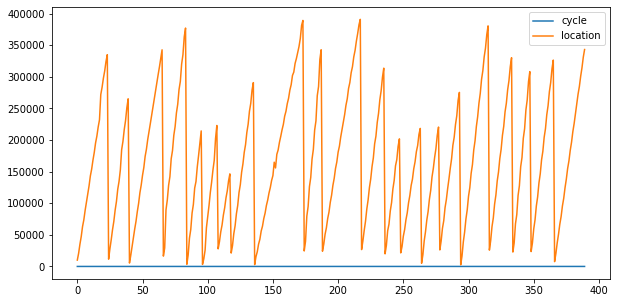

In [62]:
#DATACAMP
frame.plot(figsize=(10, 5))
plt.show()

In [ ]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs,tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))